# Load data and set up the environment

In [1]:
### 
# Functions defined below are also available as utils in .py script in the `final_submissions` directory
# Additional definitions of the assessment function included for clarity of the final submission
###

In [2]:
# Define a function to assess an instance of the fitted model on the cross-validation scorer:
def model_cross_val_assess(model, X_train, y_train, model_name):
    '''
    Takes *fitted* model in args1 and applies it to the train set (predictors matrix in args2 and respone vector in args3) while also taking model's name as arg4. 
    Returns set of metrics in a dataframe object.

    ### Examplary call of the function:
    model_cross_val_assess(model, X_train, y_train, X_test, y_test, 'my_model')


    ### How to concatenate results of several models for comparison:
    a = model_cross_val_assess(model_1, X_train, y_train, 'my_model_1')
    b = model_cross_val_assess(model_2, X_train, y_train, 'my_model_2')
    c = pd.concat([a, b], axis=1)
    '''
    import pandas as pd
    import numpy as np
    import locale
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
    from sklearn.model_selection import cross_val_score

    def get_num_columns(X):
        if isinstance(X, pd.DataFrame):
            return len(X.columns)
        elif isinstance(X, np.ndarray):
            return X.shape[1]
        else:
            raise TypeError('X must be a pandas DataFrame or a NumPy array')

    scores_dict = {}

    # Use cross-validation to evaluate the model on the training data
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

    # Calculate the mean and standard deviation of the cross-validation scores
    mean_score = -scores.mean()
    std_score = scores.std()
    coef_variation = std_score / mean_score

    ## Additionally metrics for assessment on train set
    # R2 score
    y_pred = model.predict(X_train)
    r2 = r2_score(y_train, y_pred)

    # Adjusted R2
    p = get_num_columns(X_train)
    n = len(y_train)
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

    # Now return the metrics as the dict
    scores_dict[model_name] = [r2, adj_r2, mean_score, std_score, coef_variation]

    df_train_eval = pd.DataFrame(data=scores_dict, index=['r2', 'adj_r2', 'mean_cv_rmse', 'std_cv_rmse', 'coef_of_var'])
    
    # Set float_format to display numbers without scientific notation and with thousand separators
    locale.setlocale(locale.LC_ALL, '')  # Set the locale to the user's default locale
    pd.options.display.float_format = lambda x: format(locale.atof(f"{x:.1f}"), ',') if abs(x) > 999 else f"{x:.4f}"
    # in case the thousand separator is displaying incorrectly, please comment out/delete the above 2 lines and use uncomment this line:
    # pd.set_option('display.float_format', lambda x: '%.3f' % x)
    
    
    return df_train_eval

In [3]:
# Define a function to assess an instance of the fitted model on the test set:
def model_assess(model, X_test, y_test, model_name):
    '''
    Takes *fitted* model in args1 and applies it to the test set (predictors matrix in args2 and respone vector in args3) while also taking model's name as arg4. 
    Returns set of metrics in a dataframe object.

    ### Examplary call of the function:
    model_assess(model, X_test, y_test, 'my_model')

    
    ### How to concatenate results of several models for comparison:
    a = model_assess(model_1, X_test, y_test, 'my_model_1')
    b = model_assess(model_2, X_test, y_test, 'my_model_2')
    c = pd.concat([a, b], axis=1)
    '''
    import pandas as pd
    import numpy as np
    import locale
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

    def get_num_columns(X):
        if isinstance(X, pd.DataFrame):
            return len(X.columns)
        elif isinstance(X, np.ndarray):
            return X.shape[1]
        else:
            raise TypeError('X must be a pandas DataFrame or a NumPy array')

    scores_dict = {}

    # Access predictions of the fitted model on test data
    y_pred = model.predict(X_test)

    ## Metrics
    # R2 score
    r2 = r2_score(y_test, y_pred)

    # Adjusted R2
    p = get_num_columns(X_test)
    n = len(y_test)
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

    # RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # MAE
    mae = mean_absolute_error(y_test, y_pred)

    # MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # Now return the metrics as the dict
    scores_dict[model_name] = [r2, adj_r2, rmse, mae, mape]

    df_eval = pd.DataFrame(data=scores_dict, index=['r2', 'adj_r2', 'rmse', 'mae', 'mape'])
    
    # Set float_format to display numbers without scientific notation and with thousand separators
    locale.setlocale(locale.LC_ALL, '')  # Set the locale to the user's default locale
    pd.options.display.float_format = lambda x: format(locale.atof(f"{x:.1f}"), ',') if abs(x) > 999 else f"{x:.4f}"
    # in case the thousand separator is displaying incorrectly, please comment out/delete the above 2 lines and use uncomment this line:
    # pd.set_option('display.float_format', lambda x: '%.3f' % x)
    
    
    return df_eval

In [4]:
# System communication
import os
import sys

# Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pycountry_convert as pc

# Model assessment - custom utils for systematic scoring and comparison
# from model_cross_val_assessment import model_cross_val_assess
# from model_assessment import model_assess

# Model assessment - for at-hand scoring
from sklearn.metrics import r2_score, mean_squared_error

# Modelling
from sklearn.model_selection import GroupShuffleSplit, GridSearchCV, KFold, GroupKFold, RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from scipy.sparse import lil_matrix, csr_matrix
from scipy.stats import f_oneway, chi2_contingency, randint
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor 

In [5]:
## Load the data set

# Data set that was first cleaned then merged
df_final = pd.read_csv('df_final.csv')

In [6]:
df_final.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'state_code',
       'founded_at', 'first_funding_at', 'last_funding_at',
       'funding_round_permalink', 'funded_at', 'acquirer_permalink',
       'acquirer_name', 'acquirer_category_list', 'acquirer_market',
       'acquirer_country_code', 'acquirer_state_code', 'acquirer_region',
       'acquirer_city', 'acquired_at', 'acquired_month', 'acquired_quarter',
       'acquired_year', 'investor_permalink', 'investor_name',
       'funding_total_usd', 'market', 'status', 'country_code', 'region',
       'city', 'funding_rounds', 'funding_round_type', 'funding_round_code',
       'funded_month', 'funded_quarter', 'funded_year', 'raised_amount_usd',
       'price_amount', 'price_currency_code', 'investor_country_code',
       'investor_region', 'investor_city'],
      dtype='object')

In [7]:
# To-int-to-str dtype for date-related features
df_final['funded_month'] = df_final['funded_month'].astype('int64').astype('str')
df_final['funded_quarter'] = df_final['funded_quarter'].astype('int64').astype('str')
df_final['funded_year'] = df_final['funded_year'].astype('int64').astype('str')

# Modelling

## Linear models

In [8]:
# Small cleaning for ID/timestamp type-of columns and columns with NaN
df_final_linear = df_final.drop(columns=['homepage_url', 'category_list', 'name', 'investor_permalink', 'price_amount',
                       'acquirer_permalink', 'acquired_at', 'acquired_month', 'acquired_quarter', 'acquired_year', 
                       'founded_at', 'first_funding_at', 'last_funding_at','funding_round_permalink', 'funded_at'])

df_final_linear.reset_index(drop=True, inplace=True)

# Move target to the second column position for convenience
df_final_linear.insert(1, 'funding_total_usd', df_final_linear.pop('funding_total_usd'))

In [9]:
# Further cleaning - customizable; to explore tilts in covariates
df_final_linear = df_final_linear.drop(columns=['price_currency_code', 'acquirer_state_code', 'state_code'])
df_final_linear.reset_index(drop=True, inplace=True)

In [10]:
splitter = GroupShuffleSplit(test_size=0.20, n_splits=1, random_state = 123)
split = splitter.split(df_final_linear, groups=df_final_linear['permalink'])
train_idx, test_idx = next(split)

train = df_final_linear.iloc[train_idx]
test = df_final_linear.iloc[test_idx]

X_train, y_train = train.iloc[:, train.columns.get_loc('acquirer_name'):], train.iloc[:, train.columns.get_loc('funding_total_usd')]
X_test, y_test = test.iloc[:, test.columns.get_loc('acquirer_name'):], test.iloc[:, test.columns.get_loc('funding_total_usd')]

#### Linear regression

In [11]:
# Continuous variables are stored in a list called continuous_vars
# Categorical variables are stored in a list called categorical_vars

# Get the column names of the continuous and categorical variables
continuous_vars = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
categorical_vars = list(X_train.select_dtypes(include=['object', 'datetime64[ns]']).columns)

In [12]:
# Define preprocessing steps for continuous variables
continuous_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define preprocessing steps for categorical variables
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [13]:
# Combine noww
preprocessor = ColumnTransformer(
    transformers=[
        ('continuous', continuous_transformer, continuous_vars),
        ('categorical', categorical_transformer, categorical_vars)
    ])

In [14]:
# Fit linear regression model with preprocessor
model_linreg_f = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model_linreg_f.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['funding_rounds',
                                                   'raised_amount_usd']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['acquirer_name',
                                                   'acquirer_category_list',
                                                   'acquirer_market',
                                                   'acquirer_country_code',
                                                   '

In [15]:
# Cross-validation scores on train sets
lin_a_cv = model_cross_val_assess(model_linreg_f, X_train, y_train, 'model_linreg_f')
# ---------
lin_a_cv

model_linreg_f
r2                    0.6545
adj_r2                0.6544
mean_cv_rmse    94,765,183.8
std_cv_rmse     22,744,698.6
coef_of_var           0.2400

In [16]:
# Performance on test set
lin_a_test = model_assess(model_linreg_f, X_test, y_test, 'model_linreg_f')
# ---------
lin_a_test

model_linreg_f
r2              0.5702
adj_r2          0.5697
rmse     128,229,239.3
mae       40,203,041.0
mape          125.3670

In [17]:
# Get the feature names for the one-hot encoded variables
onehot_columns = preprocessor.named_transformers_[
    'categorical'].named_steps['onehot'].get_feature_names_out(categorical_vars)

# Combine the continuous variable names and one-hot encoded variable names
feature_names = continuous_vars + list(onehot_columns)

# Get the coefficients and feature importances
coefficients = model_linreg_f.named_steps['regressor'].coef_
importances = coefficients

# Table of feature importances
importance_df = pd.DataFrame(
    {'Feature': feature_names, 'Importance': importances})

# Sort df by importance score
importance_df = importance_df.sort_values('Importance', ascending=False)

# Most important features put together
print("Most influential scores, both sides:")
a_a = importance_df.head(30)
b_b = importance_df.tail(30)
c_c = pd.concat([a_a, b_b], axis=0)
# ---------
c_c

Most influential scores, both sides:


Feature      Importance
4711                       investor_name_EquityZen 1,067,868,567.7
12956                               city_The Hague   780,227,135.8
4789     investor_name_Farallon Capital Management   638,805,616.4
7104                      investor_name_Point Nine   509,545,223.5
5487                  investor_name_Iconiq Capital   456,692,161.6
4840                     investor_name_First Solar   434,086,337.0
2890                investor_name_21st Century Fox   406,329,525.2
13284                         funding_round_code_H   394,026,869.5
12140                                 city_Modi'in   377,928,371.6
4059                investor_name_Chengwei Capital   361,498,097.0
4484        investor_name_Digital Sky Technologies   360,846,181.4
8872                      investor_name_Y Ventures   355,419,614.3
8618                     investor_name_Venture TDF   333,167,311.8
6479                          investor_name_Myriad   325,496,248.7
8026                   investor_name_Suncor Energy   324,567,362.0
9126                          market_ Communities    322,247,835.1
9455                      market_ Online Shopping    316,772,298.2
7486            investor_name_SAC Capital Advisors   312,661,390.3
9131                         market_ Construction    300,479,237.8
8053                        investor_name_Swiss RE   299,804,034.6
1337           acquirer_category_list_|Automotive|   285,563,051.2
2569                           acquirer_city_Elgin   285,563,051.2
1181                acquirer_name_Wanxiang America   285,563,051.2
11047                                city_Chaoyang   283,427,193.1
8315                   investor_name_The TCW Group   252,616,935.9
4651         investor_name_Empire Capital Partners   250,778,662.1
4800   investor_name_Fidelity Growth Partners Asia   230,527,370.8
4121                 investor_name_Clarium Capital   228,495,847.4
7828                          investor_name_Sofina   227,659,083.1
5251                            investor_name_HGGC   224,573,071.9
12428                          city_Peoria Heights  -167,259,395.0
12580                                city_Rijswijk  -170,392,567.3
12870                       city_Steamboat Springs  -170,467,531.0
10751                                    city_Avon  -171,079,814.0
5764               investor_name_Johnson & Johnson  -172,047,746.4
787            acquirer_name_Palantir Technologies  -172,701,251.1
4630                   investor_name_Elevar Equity  -173,366,290.9
8417        investor_name_Triangle Growth Partners  -175,709,836.7
3427          investor_name_Avigo Capital Partners  -183,728,735.5
11898                                  city_Leiden  -196,576,876.5
11226                                   city_Delft  -197,310,330.7
7066             investor_name_Pine Brook Partners  -205,243,328.9
5787                    investor_name_K Road Power  -216,025,636.3
6719                investor_name_Norseman Capital  -245,429,169.0
5379                    investor_name_Hony Capital  -248,482,904.2
7230                 investor_name_Quasar Ventures  -257,081,344.8
5965                   investor_name_Launch Angels  -286,734,192.2
5776             investor_name_Jumpstart Ventures   -303,339,761.7
5920                     investor_name_LFE Capital  -304,718,428.5
5335      investor_name_Helios Investment Partners  -305,434,219.3
8737                           investor_name_WUTIF  -310,987,368.2
5464                          investor_name_IQ One  -315,931,742.5
10874                             city_Bolingbrook  -357,325,715.8
10730                                city_Aschheim  -435,999,698.6
5005                     investor_name_GI Partners  -446,530,530.2
5767                    investor_name_Joho Capital  -587,000,405.8
14329                  investor_city_Hermosa Beach  -631,032,696.9
6209          investor_name_Marlin Equity Partners  -631,032,696.9
8873                      investor_name_YF Capital  -638,859,308.3
11929                  

#### Regularized (Ridge) regression

In [18]:
# Define a parameter grid for Ridge regression
ridge_param_grid = {
    'regressor__alpha': list(np.arange(500, 5500, step=500))
}

# Create a dictionary of regressors
regressors = {
    'ridge': Ridge()
}

# Create a dictionary of parameter grids
param_grids = {
    'ridge': ridge_param_grid
}

In [19]:
# Create an empty dictionary to store the results
results_regularized = {}

# Loop over the regressors
for regressor_name, regressor in regressors.items():

    # Create a pipeline for each regressor
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    # Create a grid search object for the regressor
    grid_search = GridSearchCV(
        pipeline, param_grids[regressor_name], cv=5, n_jobs=-1)

    # Fit the grid search object on the training data
    grid_search.fit(X_train, y_train)

    # Store the results in the dictionary
    results_regularized[regressor_name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
    }

    # Print the results
    print(regressor_name, 'best parameters:',
          results_regularized[regressor_name]['best_params'])
    print(regressor_name, 'best training R2 score:',
          results_regularized[regressor_name]['best_score'])

ridge best parameters: {'regressor__alpha': 3000}
ridge best training R2 score: 0.4885672080740403


In [20]:
# Extract the best fitted model
model_ridge_f = grid_search.best_estimator_

In [21]:
# Cross-validation scores on train sets
lin_b_cv = model_cross_val_assess(model_ridge_f, X_train, y_train, 'model_ridge_f')
# ---------
lin_b_cv

model_ridge_f
r2                   0.4957
adj_r2               0.4956
mean_cv_rmse   82,310,965.2
std_cv_rmse    26,801,694.0
coef_of_var          0.3256

In [22]:
# Performance on test set
lin_b_test = model_assess(model_ridge_f, X_test, y_test, 'model_ridge_f')
# ---------
lin_b_cv

model_ridge_f
r2                   0.4957
adj_r2               0.4956
mean_cv_rmse   82,310,965.2
std_cv_rmse    26,801,694.0
coef_of_var          0.3256

#### SVD with linear regression - tuned components

In [23]:
# # This pipeline was tuned before, yielded 22 components as best hp

# # Define pipeline for TruncatedSVD and linear regression
# svd_pipe = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('svd', TruncatedSVD(random_state=0)),
#     ('regressor', LinearRegression())
# ])

# # Define the parameter grid for TruncatedSVD
# param_grid = {'svd__n_components': range(1, len(continuous_vars) + len(categorical_vars) + 1)}

# # Define the cross-validation strategy
# cv_svd = KFold(n_splits=5, shuffle=True, random_state=123)

In [24]:
# # Perform grid search with cross-validation
# grid_search = GridSearchCV(svd_pipe, param_grid=param_grid, cv=cv_svd, scoring='r2', n_jobs=-1)
# grid_search.fit(X_train, y_train)

In [25]:
# # Print the best parameters and the best score
# print("Best number of components:", grid_search.best_params_['svd__n_components'])
# print("Best training R2 score:", grid_search.best_score_)

In [26]:
# # Get the best estimator from the grid search
# model_svd_f = grid_search.best_estimator_

# # Fit the best estimator on the training data
# model_svd_f.fit(X_train, y_train)

In [27]:
# # Get the optimal number of components from the grid search
# optimal_n_components = grid_search.best_params_['svd__n_components']

# # Get the SVD step from the pipeline
# svd_step = model_svd_f.named_steps['svd']

# # Get the explained variance ratio of the principal components
# explained_variance = svd_step.explained_variance_ratio_.cumsum()

# # Get the number of components required to capture the threshold of variance
# n_components = len(explained_variance) # default value

# # Make the scree plot
# plt.plot((explained_variance * 100))
# plt.axvline(x=optimal_n_components-1, linestyle='--', color='r', label='Optimal Components')
# plt.xticks(np.arange(0, n_components), rotation=90)
# plt.xlabel("Number of components (Dimensions)")
# plt.ylabel("Explained variance (%)")
# plt.legend()


In [28]:
# Define pipeline for TruncatedSVD and linear regression
model_svd_f = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svd', TruncatedSVD(random_state=0, n_components=22)),
    ('regressor', LinearRegression())
])

In [29]:
# Fit the best estimator on the training data
model_svd_f.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['funding_rounds',
                                                   'raised_amount_usd']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['acquirer_name',
                                                   'acquirer_category_list',
                                                   'acquirer_market',
                                                   'acquirer_country_code',
                                                   '

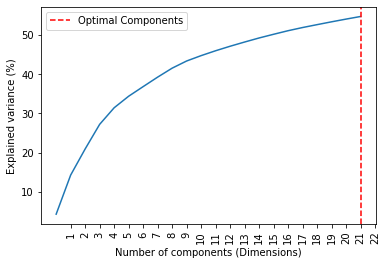

In [30]:
# Get the optimal number of components
optimal_n_components = model_svd_f.n_features_in_

# Get the explained variance ratio of the principal components
explained_variance = model_svd_f.named_steps['svd'].explained_variance_ratio_.cumsum()

# Get the number of components required to capture the threshold of variance
n_components = len(explained_variance) # default value

# Make the scree plot
plt.plot((explained_variance * 100))
plt.axvline(x=optimal_n_components-1, linestyle='--', color='r', label='Optimal Components')
plt.xticks(np.arange(1, n_components+1), rotation=90)
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")
plt.legend()


In [31]:
# Cross-validation scores on train sets
lin_c_cv = model_cross_val_assess(model_svd_f, X_train, y_train, 'model_svd_f')
# ---------
lin_c_cv

model_svd_f
r2                 0.4755
adj_r2             0.4754
mean_cv_rmse 82,698,018.7
std_cv_rmse  26,154,785.9
coef_of_var        0.3163

In [32]:
# Performance on test set
lin_c_test = model_assess(model_svd_f, X_test, y_test, 'model_svd_f')
# ---------
lin_c_test

model_svd_f
r2            0.6391
adj_r2        0.6387
rmse   117,498,887.3
mae     30,138,338.3
mape        116.1943

#### Model's comparison

In [33]:
# Compare performance - train sets with cross-validation scoring against RMSE
linear_performance_cross_val = pd.concat([lin_a_cv, lin_b_cv, lin_c_cv], axis=1)
# ---------
linear_performance_cross_val

model_linreg_f  model_ridge_f  model_svd_f
r2                    0.6545         0.4957       0.4755
adj_r2                0.6544         0.4956       0.4754
mean_cv_rmse    94,765,183.8   82,310,965.2 82,698,018.7
std_cv_rmse     22,744,698.6   26,801,694.0 26,154,785.9
coef_of_var           0.2400         0.3256       0.3163

In [34]:
# Compare performance - test sets
linear_performance_test = pd.concat([lin_a_test, lin_b_test, lin_c_test], axis=1)
# ---------
linear_performance_test

model_linreg_f  model_ridge_f   model_svd_f
r2              0.5702         0.6283        0.6391
adj_r2          0.5697         0.6279        0.6387
rmse     128,229,239.3  119,235,127.6 117,498,887.3
mae       40,203,041.0   29,436,624.2  30,138,338.3
mape          125.3670       111.2556      116.1943

## Non-linear models

### Gradient Boosting

#### Using the entire dataset

In [61]:
# First defining the variables to discard. We discard price amount and price currency code here, because it is missing for the majority of the observations.
to_remove = ['name','homepage_url', 'category_list', 'first_funding_at', 'last_funding_at', 'founded_at',
             'funding_round_permalink', 'funded_at','investor_permalink', 'investor_name', 'acquirer_permalink', 
             'acquirer_name', 'acquirer_category_list','acquirer_state_code', 'acquirer_city', 'acquired_at', 
            'acquired_month', 'acquired_quarter', 'acquired_year', 'acquirer_country_code', 'acquirer_region', 'state_code',
            'price_amount', 'price_currency_code']

In [62]:
# Here we are not including permalink in the variables to discard as we will use this variable to define our train test split and our cross validation fold
# As such this variable will be removed after cross-validation folds are defined
df_model = df_final.drop(to_remove, axis = 1)
df_model.drop_duplicates(inplace = True) # there was a large number of duplicates after dropping the other columns - around 10 k or so
df_model.reset_index(inplace=True, drop=True)

# defining groups based on permalink for the splitting later
groups = df_model['permalink']

In [63]:
X = df_model.drop('funding_total_usd', axis = 1)
y = df_model['funding_total_usd']

In [64]:
# The new train-test split using groups based on permalinks - basically so companies don't appear in both train and test sets, which would cause data leakage
splitter = GroupShuffleSplit(test_size=.20, n_splits=1, random_state = 123)
train_idx, test_idx = next(splitter.split(X,y,groups))

X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

In [65]:
# Defining the groups for cross-validation later if wanted and dropping the extra variable permalink now
groups_cv = X_train['permalink']
X_train.drop('permalink', axis = 1, inplace = True)
X_test.drop('permalink', axis = 1, inplace = True)

C:\Users\oleek\AppData\Local\Temp\ipykernel_20864\1943101124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop('permalink', axis = 1, inplace = True)
C:\Users\oleek\AppData\Local\Temp\ipykernel_20864\1943101124.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop('permalink', axis = 1, inplace = True)


In [66]:
# Continuous variables are stored in a list called continuous_vars
# Categorical variables are stored in a list called categorical_vars}

# Get the column names of the continuous and categorical variables
continuous_vars = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
categorical_vars = list(X_train.select_dtypes(include=['object', 'datetime64[ns]']).columns)

In [67]:
# Define preprocessing steps for continuous variables
continuous_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define preprocessing steps for categorical variables
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [68]:
# Combine noww
preprocessor = ColumnTransformer(
    transformers=[
        ('continuous', continuous_transformer, continuous_vars),
        ('categorical', categorical_transformer, categorical_vars)
    ])

In [69]:
# Creating the model using a pipeline 
model_base_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state = 1541, n_estimators = 200, min_samples_split = 5, max_features = 1500, max_depth = 2, learning_rate = 0.1)) #for randomized search we removed all the parameters except random state
    #results of randomized cross validation:
     #{'regressor__n_estimators': 200,
     # 'regressor__min_samples_split': 5,
     # 'regressor__max_features': 1500,
     # 'regressor__max_depth': 2,
     # 'regressor__learning_rate': 0.1}
])

In [70]:
# Now that our model pipeline is ready, we apply cross-validation. Here we choose to do random search instead of the exhaustive grid search to save computational resources. 
# This to be used for the CV parameter in the random search/grid search function - lets the function know to also split the folds based on the groups of companies
gkf = GroupKFold(n_splits = 5)

# # Tuning grid for cross-validation
# gb_grid = {'regressor__n_estimators': [100, 200,400,600,800],
#             'regressor__max_features': ['sqrt','log2', 500, 1000, 1500],
#             'regressor__learning_rate':[.001, .01, .05, .1, 0.5],
#             'regressor__max_depth': [2,3,6,8,10],
#             'regressor__min_samples_split': [2,3,5]}

# # Here the random search function is defined with 150 iterations of different combinations from the grid
# random_search  = RandomizedSearchCV(n_iter = 25, estimator = model_base_gb,param_distributions= gb_grid, cv = gkf,
#                                     n_jobs = -1, verbose = 2, scoring = 'neg_root_mean_squared_error', random_state = 2)



In [71]:
# random_search.fit(X_train, y_train, groups = groups_cv)

In [72]:
# random_search.best_params_

In [73]:
# random_search.best_score_

In [74]:
# best_random = random_search.best_estimator_

In [75]:
# cross_val_score(best_random, X_train, y_train,scoring = 'neg_root_mean_squared_error', cv = gkf, groups = groups_cv).mean()

In [76]:
model_base_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['funding_rounds',
                                                   'raised_amount_usd']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['acquirer_market', 'market',
                                                   'status', 'country_code',
                                                   'region', 'city',
                                                   'funding_round_type',
                                            

In [77]:
base_gb_cv = model_cross_val_assess(model_base_gb, X_train, y_train, 'base_gb')
# ---------
base_gb_cv

base_gb
r2                 0.7546
adj_r2             0.7545
mean_cv_rmse 85,822,880.6
std_cv_rmse  25,361,034.4
coef_of_var        0.2955

In [78]:
base_gb_test = model_assess(model_base_gb, X_test, y_test, 'base_gb')
# ---------
base_gb_test

base_gb
r2            0.5037
adj_r2        0.5033
rmse   141,670,000.0
mae     27,204,562.1
mape         43.7782

#### Using one row per company - removing duplicate entries from the merging

In [79]:
# Seeing the large discrepancy between the cross-validation score and the test score, we can see that the previous model potentially overfits on the training data. 
# This makes sense since there are multiple rows per company in the dataet, with only a few variables differentiating (usually investor or round information). 
# This can cause the model to learn the characteristics of the companies in the train set very well but not in the test set. 
# To test this, we can see if removing the duplicate rows per company improves the performance of the model.

In [80]:
df_nodup = df_final.drop_duplicates(subset = ['permalink'])
df_nodup.shape

(28719, 42)

In [81]:
to_remove = ['permalink','name','homepage_url', 'category_list', 'first_funding_at', 'last_funding_at', 'founded_at',
             'funding_round_permalink', 'funded_at','investor_permalink', 'investor_name', 'acquirer_permalink', 
             'acquirer_name', 'acquirer_category_list','acquirer_state_code', 'acquirer_city', 'acquired_at', 
            'acquired_month', 'acquired_quarter', 'acquired_year', 'acquirer_country_code', 'acquirer_region', 'state_code',
            'price_amount', 'price_currency_code']

In [82]:
df_model = df_nodup.drop(to_remove, axis = 1)
df_model.shape

(28719, 17)

In [83]:
X = df_model.drop('funding_total_usd', axis = 1)
y = df_model['funding_total_usd']

In [84]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1756) 

In [85]:
# Fit gradient boosting regressor model with preprocessor
model_nodup_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state = 1541, n_estimators = 400, min_samples_split = 2, max_features = 1500, max_depth = 3, learning_rate = 0.1))
     #these parameters are taken from a previous random search with the same parameter grid as before
])

model_nodup_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['funding_rounds',
                                                   'raised_amount_usd']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['acquirer_market', 'market',
                                                   'status', 'country_code',
                                                   'region', 'city',
                                                   'funding_round_type',
                                            

In [86]:
nodup_gb_cv = model_cross_val_assess(model_nodup_gb, X_train, y_train, 'nodup_gb')
# ---------
nodup_gb_cv

nodup_gb
r2                 0.9287
adj_r2             0.9286
mean_cv_rmse 58,504,264.1
std_cv_rmse  21,694,606.1
coef_of_var        0.3708

In [87]:
nodup_gb_test = model_assess(model_nodup_gb, X_test, y_test, 'nodup_gb')
# ---------
nodup_gb_test

nodup_gb
r2           0.4604
adj_r2       0.4589
rmse   48,820,755.0
mae     8,949,026.6
mape        40.5325

In [88]:
# As can be seen, the performance is significantly better. This confirms our previous hypothesis. 

#### Using one row per company and minor feature engineering

In [89]:
# Let's isolate the categorical variables of interest (so all categorical variables except for the identification variables such as permalinks and names).
categorical_vars = list(df_nodup.select_dtypes(include=['object', 'datetime64[ns]']).columns)

In [90]:
categorical_vars = [categorical_vars[4],*categorical_vars[13:18],*categorical_vars[21:]]
categorical_vars

['state_code',
 'acquirer_market',
 'acquirer_country_code',
 'acquirer_state_code',
 'acquirer_region',
 'acquirer_city',
 'market',
 'status',
 'country_code',
 'region',
 'city',
 'funding_round_type',
 'funding_round_code',
 'funded_month',
 'funded_quarter',
 'funded_year',
 'price_currency_code',
 'investor_country_code',
 'investor_region',
 'investor_city']

In [91]:
# Let's see the relationship between the categorical variables and the target variable using an ANOVA test. If the p-value is lower than a threshold (0.1). 
# It means that the average target variable (total funding) is significantly different across categories.

# Calculate ANOVA
for i in categorical_vars:
    grouped_data = df_nodup.groupby(i)['funding_total_usd']
    f_value, p_value = f_oneway(*[grouped_data.get_group(x) for x in grouped_data.groups])
    print(f'F-value - {i}:', f_value)
    print(f'p-value - {i}:', p_value)

# Print results

F-value - state_code: 2.5801975913914896
p-value - state_code: 2.023364770583877e-10
F-value - acquirer_market: 1.3449851222862135
p-value - acquirer_market: 0.00014217922167495032
F-value - acquirer_country_code: 1.3814935996568338
p-value - acquirer_country_code: 0.05702718253911847
F-value - acquirer_state_code: 30.8568967181551
p-value - acquirer_state_code: 3.274258399631912e-271
F-value - acquirer_region: 8.128112664881998
p-value - acquirer_region: 3.609285818657157e-218
F-value - acquirer_city: 7.923472579179499
p-value - acquirer_city: 0.0
F-value - market: 1.217852977735501
p-value - market: 8.138075699482296e-05
F-value - status: 15.426300571235867
p-value - status: 5.036671859193323e-10
F-value - country_code: 1.9146062842219238
p-value - country_code: 7.442739349195739e-08
F-value - region: 0.6080592284313217
p-value - region: 0.9999999999999999
F-value - city: 0.679836307619032
p-value - city: 0.9999999999999999
F-value - funding_round_type: 154.09915958012752
p-value - f

In [92]:
# All variables besides acquirer country code, region, city and funded quarter seem to be correlated with the target variable. 
# This may be because for some of these variables there are only a few observations belonging to a particular category, 
# so this would then skew the average total funding per category (e.g. city) a lot.

# Let's group up smaller categories into the 'other' category. For these categories, the model does not have enough data to establish a proper relationship 
# so this should help the performance. Here we choose to group all categories with 5 observations or less.

# When we do this, region and city become now correlated with the target variable (p-values < 0.1). 
# Funded quarter is still strongly unrelated so it is dropped (added to the to_remove list).

In [93]:
for i in categorical_vars:
    counts = df_nodup[i].value_counts()
    unique_values = counts[counts <= 5].index.tolist()
    df_nodup.loc[df_nodup[i].isin(unique_values), i] = 'other'

In [94]:
to_remove = ['permalink','name','homepage_url', 'category_list', 'first_funding_at', 'last_funding_at', 'founded_at',
             'funding_round_permalink', 'funded_at','investor_permalink', 'investor_name', 'acquirer_permalink', 
             'acquirer_name', 'acquirer_category_list','acquirer_state_code', 'acquirer_city', 'acquired_at', 
            'acquired_month', 'acquired_quarter', 'acquired_year', 'acquirer_country_code', 'acquirer_region', 'state_code',
            'price_amount', 'price_currency_code', 'funded_quarter']

In [95]:
# Now just repeat
df_model = df_nodup.drop(to_remove, axis = 1)
df_model.shape

(28719, 16)

In [96]:
X = df_model.drop('funding_total_usd', axis = 1)
y = df_model['funding_total_usd']

In [97]:
# Continuous variables are stored in a list called continuous_vars
# Categorical variables are stored in a list called categorical_vars}

# Get the column names of the continuous and categorical variables
continuous_vars = list(X.select_dtypes(include=['int64', 'float64']).columns)
categorical_vars = list(X.select_dtypes(include=['object', 'datetime64[ns]']).columns)

In [98]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1756)

In [99]:
# Define preprocessing steps for continuous variables
continuous_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define preprocessing steps for categorical variables
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [100]:
# Combine noww
preprocessor = ColumnTransformer(
    transformers=[
        ('continuous', continuous_transformer, continuous_vars),
        ('categorical', categorical_transformer, categorical_vars)
    ])

In [101]:
# Fit gradient boosting regressor model with preprocessor
model_catgroup_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state = 1541, n_estimators = 400, min_samples_split = 2, max_features = 1500, max_depth = 3, learning_rate = 0.1))
    # same hyperparameters as above
])

model_catgroup_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['funding_rounds',
                                                   'raised_amount_usd']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['acquirer_market', 'market',
                                                   'status', 'country_code',
                                                   'region', 'city',
                                                   'funding_round_type',
                                            

In [102]:
catgroup_gb_cv = model_cross_val_assess(model_catgroup_gb, X_train, y_train,'catgroup_gb')
# ---------
catgroup_gb_cv

catgroup_gb
r2                 0.9395
adj_r2             0.9394
mean_cv_rmse 54,633,112.1
std_cv_rmse  24,192,030.0
coef_of_var        0.4428

In [103]:
catgroup_gb_test = model_assess(model_catgroup_gb, X_test, y_test, 'catgroup_gb')
# ---------
catgroup_gb_test

catgroup_gb
r2           0.5816
adj_r2       0.5805
rmse   42,987,381.1
mae     8,729,483.5
mape        28.1006

In [104]:
# The performance on the test set increased considerably, with a decrease in RMSE by about 6 million dollars 
# and the cross-validation performance is also considerably better. 
# Therefore, we decide to keep these changes.

#### Flattening the dataset while retaining as much information as possible

In [105]:
# Now that we have established that the model performs significantly better with a flatter representation, 
# where each company is represented by one row, we will now flatten the dataset in the same way 
# but this time retaining all the original information from the base dataset.

In [106]:
# For this, we will first convert the funding date information into categorical/object variables.
# Set up new object
df_flat = df_final.copy()

In [107]:
# We will also use a function we used above to group up the small populated categories into the value 'other':
for i in categorical_vars:
    counts = df_nodup[i].value_counts()
    unique_values = counts[counts <= 5].index.tolist()
    df_flat.loc[df_flat[i].isin(unique_values), i] = 'other'

In [108]:
# we keep the permalink variable since it is necessary for company identification
to_remove = ['name','homepage_url', 'category_list', 'first_funding_at', 'last_funding_at', 'founded_at',
             'funding_round_permalink', 'funded_at','investor_permalink', 'investor_name', 'acquirer_permalink', 
             'acquirer_name', 'acquirer_category_list','acquirer_state_code', 'acquirer_city', 'acquired_at', 
            'acquired_month', 'acquired_quarter', 'acquired_year', 'acquirer_country_code', 'acquirer_region', 'state_code',
            'price_amount', 'price_currency_code']

In [109]:
df_flat_model = df_flat.drop(to_remove, axis = 1)
df_flat_model.shape

(92975, 18)

In [110]:
# Adding a prefix to each of the column values - necessary to have unique column names for later, since we will be using the values inside the table to create dummies
# loop through the columns
for col in df_flat_model.columns:
    # check if the column is a string column
    if df_flat_model[col].dtype == 'object':
        # add prefix to the values in the column
        df_flat_model[col] = col + '_' + df_flat_model[col].astype(str)

In [111]:
string_cols = df_flat_model.select_dtypes(include=['object']).columns

# Create a dictionary of aggregation functions to apply to each column
agg_dict = {}
for col in df_flat_model.columns:
    if col in string_cols:
        # for categorical variables, put the unique values per permalink into a list
        agg_dict[col] = lambda x: x.unique().tolist()
    else:
        # for numerical variables, select the maximum raised amount variable, 
        # otherwise pick the first number (this should never happen though since we only have raised amount as a numeric variable)
        agg_dict[col] = 'max' if col == 'raised_amount_usd' else 'first'

# Group by name column and aggregate
df_flat_model = df_flat_model.groupby("permalink", as_index=False).agg(agg_dict)

# select the categorical/string columns and remove the square brackets that are generated by a list, then join them with a comma
string_cols = df_flat_model.select_dtypes(include=['object']).columns
df_flat_model[string_cols] = df_flat_model[string_cols].apply(lambda x: x.str.join(',').str.replace(r'\[|\]', ''))

C:\Users\oleek\AppData\Local\Temp\ipykernel_20864\1628429815.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df_flat_model[string_cols] = df_flat_model[string_cols].apply(lambda x: x.str.join(',').str.replace(r'\[|\]', ''))


In [112]:
df_flat_model.drop('permalink', axis = 1, inplace = True)

In [113]:
# create the dummy variables based on a comma separation for our categorical variables
# this applies to all categorical variables besides basic company information
dummies = ['acquirer_market', 'funding_round_type', 'funding_round_code', 'funded_month', 'funded_quarter', 'funded_year',
          'investor_country_code', 'investor_region', 'investor_city'] 

# create an empty data frame for the loop function to add the dummy variables onto
df_dummies = pd.DataFrame()

for var in dummies:
    dummies_temp = df_flat_model[var].str.get_dummies(sep = ',')
    df_dummies = pd.concat([df_dummies, dummies_temp], axis = 1)

In [114]:
# merge it with the original dataset and drop the original variables, which the dummies are based on
df_flat_dm = pd.concat([df_flat_model, df_dummies], axis = 1)
df_flat_dm.drop(dummies, axis = 1, inplace = True)
df_flat_dm

funding_total_usd                          market            status  \
0              700,000.0                  market_Unknown  status_operating   
1              762,851.0          market_ Biotechnology   status_operating   
2           10,600,000.0              market_ Analytics   status_operating   
3            1,150,050.0                 market_ Mobile   status_operating   
4               40,000.0             market_ E-Commerce   status_operating   
...                  ...                             ...               ...   
28714        2,150,000.0  market_ Public Transportation   status_operating   
28715       15,419,877.0          market_ Biotechnology      status_closed   
28716        2,686,600.0          market_ Biotechnology   status_operating   
28717          320,000.0              market_ Education   status_operating   
28718           97,398.0        market_ Web Development   status_operating   

           country_code                region                        city  \
0      country_code_USA     region_DE - Other          city_Delaware City   
1      country_code_CAN      region_Vancouver              city_Vancouver   
2      country_code_USA    region_SF Bay Area          city_Mountain View   
3      country_code_USA    region_SF Bay Area          city_San Francisco   
4      country_code_CHL       region_Santiago             city_Las Condes   
...                 ...                   ...                         ...   
28714  country_code_USA  region_New York City               city_New York   
28715  country_code_MYS    region_MYS - Other  city_Damansara New Village   
28716  country_code_AUT         region_Vienna     city_Gerasdorf Bei Wien   
28717  country_code_GBR         region_London                 city_London   
28718  country_code_HRV          region_Split                  city_Split   

       funding_rounds  raised_amount_usd  acquirer_market_Accounting  \
0                   2          700,000.0                           0   
1                   2          719,491.0                           0   
2                   2        8,900,000.0                           0   
3                   3        1,000,050.0                           0   
4                   1           40,000.0                           0   
...               ...                ...                         ...   
28714               1        2,150,000.0                           0   
28715               4        7,991,547.0                           0   
28716               1        2,686,600.0                           0   
28717               1          320,000.0                           0   
28718               5           32,360.0                           0   

       acquirer_market_Ad Targeting  ...  investor_city_Yoqne`am `illit  \
0                                 0  ...                              0   
1                                 0  ...                              0   
2                                 0  ...                              0   
3                                 0  ...                              0   
4                                 0  ...                              0   
...                             ...  ...                            ...   
28714                             0  ...                              0   
28715                             0  ...                              0   
28716                             0  ...                              0   
28717                             0  ...                              0   
28718                             0  ...                              0   

       investor_city_Zagreb  investor_city_Zaragoza  investor_city_Zaventem  \
0                         0                       0                       0   
1                         0                       0                       0   
2                         0                       0                       0   
3                         0                       0            

In [115]:
# Let's convert the int64 data types to int16 to save memory and make it run faster.
int64_cols = df_flat_dm.select_dtypes(include = 'int64').columns
df_flat_dm[int64_cols] = df_flat_dm[int64_cols].astype('int16')

In [116]:
X = df_flat_dm.drop('funding_total_usd', axis = 1)
y = df_flat_dm['funding_total_usd']

In [117]:
# Continuous variables are stored in a list called continuous_vars
# Categorical variables are stored in a list called categorical_vars}

# Get the column names of the continuous and categorical variables
continuous_vars = list(X.select_dtypes(include=['float64']).columns) #we will only scale the raised amount/float variables - we don't want to scale the dummy variables already present
categorical_vars = list(X.select_dtypes(include=['object', 'datetime64[ns]']).columns)

other_vars = list(set(list(X.columns)) - set(continuous_vars) - set(categorical_vars)) #all the remaining variables

In [118]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1756) 

In [119]:
# Define preprocessing steps for continuous variables
continuous_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
# Define preprocessing steps for categorical variables
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
#we want the other variables to stay the same - no changes
identity_transformer = Pipeline(steps=[
    ('identity', FunctionTransformer(lambda x: x))
])

In [120]:
# Combine noww
preprocessor = ColumnTransformer(
    transformers=[
        ('continuous', continuous_transformer, continuous_vars),
        ('categorical', categorical_transformer, categorical_vars),
        ('other', identity_transformer, other_vars)
    ])

In [121]:
# Fit gradient boosting regressor to data
model_flat_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('sparse_matrix', FunctionTransformer(lambda x: csr_matrix(x))),
    ('regressor', GradientBoostingRegressor(random_state = 1541, n_estimators = 400, min_samples_split = 2, max_depth = 3, learning_rate = 0.1))
])

model_flat_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['raised_amount_usd']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['market', 'status',
                                                   'country_code', 'region',
                                                   'city']),
                                                 ('other',
                                                  Pipeline(steps=[('identity',
                                                                 

In [122]:
flat_gb_cv = model_cross_val_assess(model_flat_gb, X_train, y_train,'flat_gb')
# ---------
flat_gb_cv

flat_gb
r2                 0.9938
adj_r2             0.9932
mean_cv_rmse 30,620,618.9
std_cv_rmse  18,713,502.9
coef_of_var        0.6111

In [123]:
flat_gb_cv = model_assess(model_flat_gb, X_test, y_test, 'flat_gb')
# ---------
flat_gb_cv

flat_gb
r2           0.9025
adj_r2       0.8418
rmse   18,335,869.7
mae     3,277,468.0
mape         3.4930

In [124]:
preprocessor.fit_transform(X_train).shape # 6430 features

(22975, 6430)

In [125]:
# As we can see the performance is now significantly better - 
# with the RMSE on the test set falling under 20 million USD, while the cross-validation RMSE being around 30 million. 
# Now the only thing left is to perform hyperparameter tuning to get the best model possible. 

#### Hyperparameter tuning 

In [126]:
# Now that we know this is the best performing model, we perform hyperparameter tuning again, 
# with a slightly expanded parameter grid. The tuning code is again provided below commented out 
# and the actual model is already fitted with the hyperparameters, which were found to be the best using RandomizedSearchCV.

In [127]:
# # Fit gradient boosting regressor to data
# model_flat_tuning_gb = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('sparse_matrix', FunctionTransformer(lambda x: csr_matrix(x))),
#     ('regressor', GradientBoostingRegressor(random_state = 1541))
# ])

# #tuning grid for cross-validation
# gb_grid_final = {'regressor__n_estimators': [100, 200,400,600,800],
#             'regressor__max_features': ['sqrt','log2', 500, 2000, 4000, 'auto'],
#             'regressor__learning_rate':[.001, .01, .05, .1, 0.5],
#             'regressor__max_depth': [2,3,6,8],
#             'regressor__min_samples_split': [2,3,5]}

# #here the random search function is defined with 100 iterations of different combinations from the grid
# random_search_final  = RandomizedSearchCV(n_iter = 100, estimator = model_flat_tuning_gb,param_distributions= gb_grid_final, cv = 5,
#                                     n_jobs = -1, verbose = 2, scoring = 'neg_root_mean_squared_error', random_state = 2)


In [128]:
# random_search_final.fit(X_train, y_train)

In [129]:
# print(random_search_final.best_score_)
# print(random_search_final.best_params_)

In [130]:
# tuned_gb = random_search_final.best_estimator_

In [131]:
# the final tuned model
model_flat_tuned_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('sparse_matrix', FunctionTransformer(lambda x: csr_matrix(x))),
    ('regressor', GradientBoostingRegressor(random_state = 1541, n_estimators = 600, min_samples_split = 5,
                                           max_features = 'auto', max_depth = 2, learning_rate = 0.5))
])

In [132]:
model_flat_tuned_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['raised_amount_usd']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['market', 'status',
                                                   'country_code', 'region',
                                                   'city']),
                                                 ('other',
                                                  Pipeline(steps=[('identity',
                                                                 

In [133]:
flat_tuned_gb_cv = model_cross_val_assess(model_flat_tuned_gb, X_train, y_train, 'flat_tuned_gb')
# ---------
flat_tuned_gb_cv

flat_tuned_gb
r2                   0.9969
adj_r2               0.9965
mean_cv_rmse   26,642,268.7
std_cv_rmse    19,982,202.8
coef_of_var          0.7500

In [134]:
flat_tuned_gb_test = model_assess(model_flat_tuned_gb, X_test, y_test, 'flat_tuned_gb')
# ---------
flat_tuned_gb_test

flat_tuned_gb
r2             0.9073
adj_r2         0.8496
rmse     17,875,161.4
mae       3,291,717.6
mape           4.1410

#### Model's comparison

In [135]:
# Compare performance - train sets with cross-validation scoring against RMSE
gb_performance_cross_val = pd.concat([base_gb_cv, nodup_gb_cv, catgroup_gb_cv, flat_tuned_gb_cv], axis=1)
# ---------
gb_performance_cross_val

base_gb     nodup_gb  catgroup_gb  flat_tuned_gb
r2                 0.7546       0.9287       0.9395         0.9969
adj_r2             0.7545       0.9286       0.9394         0.9965
mean_cv_rmse 85,822,880.6 58,504,264.1 54,633,112.1   26,642,268.7
std_cv_rmse  25,361,034.4 21,694,606.1 24,192,030.0   19,982,202.8
coef_of_var        0.2955       0.3708       0.4428         0.7500

In [136]:
# Compare performance - test sets
gb_performance_test = pd.concat([base_gb_test, nodup_gb_test, catgroup_gb_test, flat_tuned_gb_test], axis=1)
# ---------
gb_performance_test

base_gb     nodup_gb  catgroup_gb  flat_tuned_gb
r2            0.5037       0.4604       0.5816         0.9073
adj_r2        0.5033       0.4589       0.5805         0.8496
rmse   141,670,000.0 48,820,755.0 42,987,381.1   17,875,161.4
mae     27,204,562.1  8,949,026.6  8,729,483.5    3,291,717.6
mape         43.7782      40.5325      28.1006         4.1410

### Random Forest

In [35]:
# Grab a copy of data for random forest modelling
df_final_rf = df_final.copy()

In [36]:
# Transformation to obtain enriched location information
df_final_rf['investor_country_code'] = df_final_rf['investor_country_code'].replace('ROM', 'ROU')

df_final_rf['country_code'] = df_final_rf['country_code'].replace('ROM', 'ROU')

# This function converts country codes alpha 3 to continent names, which might help grasp some additional variation in the data.
def country_to_continent(country_code):
    if country_code == 'None':
        return 'None'
    country_alpha2 = pc.country_alpha3_to_country_alpha2(country_code)
    continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    return pc.convert_continent_code_to_continent_name(continent_code)

df_final_rf['investor_continent'] = df_final_rf['investor_country_code'].apply(country_to_continent)
df_final_rf['continent'] = df_final_rf['country_code'].apply(country_to_continent)

In [37]:
df_final_rf = df_final_rf.loc[df_final_rf['price_currency_code'].str.strip() != 'USD']

In [38]:
# Only keeping the columns which will be used to run random forest.
# The choice about dropping many columns was due to lack of observations for most of the companies.

#['funding_total_usd', 'market', 'status', 'country_code','continent',
#       'state_code', 'city', 'funding_rounds', 'funding_round_type',
#       'funding_round_code', 'funded_month', 'funded_quarter', 'funded_year',
#       'raised_amount_usd', 'investor_country_code',
#       'investor_city', 'investor_continent']

"\nimportant colummns:\n\n['funding_total_usd', 'permalink', 'market', 'status', 'country_code',\n       'state_code', 'region', 'city', 'funding_rounds', 'funding_round_type',\n       'funding_round_code', 'funded_month', 'funded_quarter', 'funded_year',\n       'raised_amount_usd', 'investor_country_code', 'investor_region',\n       'investor_city', 'price_amount', 'price_currency_code',\n       'investor_continent']\n       \n"

In [39]:
# Further data transformation, aggregating the company information to one row.
df = df_final_rf

string_cols = df.select_dtypes(include=['object']).columns

# Create a dictionary of aggregation functions to apply to each column
agg_dict = {}
for col in df.columns:
    if col in string_cols:
         # for categorical variables, put the unique values per permalink into a list
        agg_dict[col] = lambda x: x.unique().tolist()
    else:
         # for numerical variables, select the maximum raised amount variable, 
        # otherwise pick the first number (this should never happen though since we only have raised amount 
        agg_dict[col] = 'sum' if col == 'raised_amount_usd' else 'first'

# Group by name column and aggregate
df = df.groupby("permalink", as_index=False).agg(agg_dict)

# select the categorical/string columns and remove the square brackets that are generated by a list, then join them with a comma
string_cols = df.select_dtypes(include=['object']).columns
df[string_cols] = df[string_cols].apply(lambda x: x.str.join(',').str.replace(r'\[|\]', ''))

df_final_rf = df

C:\Users\oleek\AppData\Local\Temp\ipykernel_20864\2033113934.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df[string_cols] = df[string_cols].apply(lambda x: x.str.join(',').str.replace(r'\[|\]', ''))


In [40]:
# only keeping relevant columns
df_final_rf = df_final_rf[['funding_total_usd', 'market', 'status', 'country_code','continent',
       'state_code', 'city', 'funding_rounds', 'funding_round_type',
       'funding_round_code', 'funded_month', 'funded_quarter', 'funded_year',
       'raised_amount_usd', 'investor_country_code',
       'investor_city', 'investor_continent']]

In [41]:
df_final_rf

funding_total_usd                   market     status country_code  \
0              700,000.0                  Unknown  operating          USA   
1              762,851.0           Biotechnology   operating          CAN   
2           10,600,000.0               Analytics   operating          USA   
3            1,150,050.0                  Mobile   operating          USA   
4               40,000.0              E-Commerce   operating          CHL   
...                  ...                      ...        ...          ...   
26250        2,150,000.0   Public Transportation   operating          USA   
26251       15,419,877.0           Biotechnology      closed          MYS   
26252        2,686,600.0           Biotechnology   operating          AUT   
26253          320,000.0               Education   operating          GBR   
26254           97,398.0         Web Development   operating          HRV   

           continent state_code                   city  funding_rounds  \
0      North America         DE          Delaware City               2   
1      North America         BC              Vancouver               2   
2      North America         CA          Mountain View               2   
3      North America         CA          San Francisco               3   
4      South America     non-US             Las Condes               1   
...              ...        ...                    ...             ...   
26250  North America         NY               New York               1   
26251           Asia     non-US  Damansara New Village               4   
26252         Europe     non-US     Gerasdorf Bei Wien               1   
26253         Europe     non-US                 London               1   
26254         Europe     non-US                  Split               5   

                       funding_round_type funding_round_code funded_month  \
0                            venture,seed          A,Unknown         10,3   
1                            seed,venture            Unknown         9,12   
2                                 venture          A,Unknown          7,1   
3                        seed,undisclosed            Unknown          7,2   
4                                    seed            Unknown            2   
...                                   ...                ...          ...   
26250                                seed            Unknown            8   
26251  private_equity,angel,grant,venture          Unknown,A     2,1,9,10   
26252                             venture                  A            1   
26253                                seed            Unknown            3   
26254               convertible_note,seed            Unknown   9,11,8,3,1   

      funded_quarter     funded_year  raised_amount_usd investor_country_code  \
0                4,1            2014          700,000.0                  None   
1                3,4            2009          762,851.0                  None   
2                3,1       2014,2013       19,500,000.0                   USA   
3                3,1  2011,2013,2014        4,300,200.0               USA,FRA   
4                  1            2013           40,000.0                   CHL   
...              ...             ...                ...                   ...   
26250              3            2013        2,150,000.0                   USA   
26251          1,3,4  2013,2008,2009       15,419,877.0              None,MYS   
26252              1            2013        2,686,600.0                   USA   
26253              1            2014          320,000.0                   USA   
26254          3,4,1  2014,2011,2013           97,398.0              None,BGR   

                                 investor_city    investor_continent  
0                                         None                  None  
1                                         None                  None  
2                          Menlo Park,New York         North America  
3      Camb

In [42]:
# obtaininng dummies from the aggregated dataset. 
# the columns in which the data appears in comma-separated lists dummies are necessary to get the most information from the set.
dummies1 = df_final_rf['funding_round_type'].str.get_dummies(sep=',').add_prefix('funding_r_type_')
dummies2 = df_final_rf['funding_round_code'].str.get_dummies(sep=',').add_prefix('funding_r_code_')
dummies3 = df_final_rf['investor_city'].str.get_dummies(sep=',').add_prefix('inv_city_')
dummies4 = df_final_rf['investor_country_code'].str.get_dummies(sep=',').add_prefix('inv_country_')
dummies7 = df_final_rf['investor_continent'].str.get_dummies(sep=',').add_prefix('inv_continent_')

#creating a dataset only with dummies
dummies = pd.concat([dummies1, dummies2, dummies3, dummies4, dummies7], axis=1)
#merging the dataset to form with all columns
rf_data_ready = pd.concat([df_final_rf, dummies], axis=1)
#dropping redundant columns
dummies_var = ['funding_round_type','funding_round_code','investor_continent', 'investor_city','investor_country_code']
#final version of the dataset
rf_data_ready = rf_data_ready.drop(dummies_var, axis = 1)

In [43]:
# Assigning observations to X (independent variables) and y(dependent variable) 
X, y = rf_data_ready.iloc[:, 1:], rf_data_ready.iloc[:, 0]

In [44]:
# Splitting the data into train and test sets. The train set constitutes of 80%, test set of 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [45]:
# Continuous variables are stored in a list called continuous_vars
# Categorical variables are stored in a list called categorical_vars

continuous_vars = list(X.select_dtypes(include=['float64']).columns)
categorical_vars = list(X.select_dtypes(
    include=['object', 'datetime64[ns]']).columns)

other_vars = list(set(list(X.columns)) - set(continuous_vars) - set(categorical_vars)) #all the remaining variables

In [46]:
# Define preprocessing steps for continuous variables
continuous_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define preprocessing steps for categorical variables
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# We want the other variables to stay the same - no changes
identity_transformer = Pipeline(steps=[
    ('identity', FunctionTransformer(lambda x: x))
])

In [47]:
# Combine now into one preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('continuous', continuous_transformer, continuous_vars),
        ('categorical', categorical_transformer, categorical_vars),
        ('other', identity_transformer, other_vars)
    ])

In [48]:
# Fit random forest regressor with preprocessor
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('sparse_matrix', FunctionTransformer(lambda x: csr_matrix(x))),
    ('regressor',  RandomForestRegressor())
])

model_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['raised_amount_usd']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['market', 'status',
                                                   'country_code', 'continent',
                                                   'state_code', 'city',
                                                   'funded_month',
                                                   'funded_quarter',
                                                   '

In [49]:
rf_cv = model_cross_val_assess(model_rf, X_train, y_train, 'model_rf')
# ---------
rf_cv

model_rf
r2                 0.9614
adj_r2             0.9588
mean_cv_rmse 31,396,504.0
std_cv_rmse   7,235,911.3
coef_of_var        0.2305

In [50]:
rf_test = model_assess(model_rf, X_test, y_test, 'model_rf')
# ---------
rf_test

model_rf
r2           0.6140
adj_r2       0.4865
rmse   60,253,891.7
mae     5,218,108.6
mape         0.6426

In [51]:
# Define pipeline for TruncatedSVD and random forest regressor
svd_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svd', TruncatedSVD(random_state=0)),
    ('regressor', RandomForestRegressor())
])

svd_param_dist = {
    'svd__n_components': range(1, len(continuous_vars) + len(categorical_vars) + 1)
}

rf_param_dist = {
    'regressor__n_estimators': randint(10, 600),
    'regressor__max_depth': randint(1, 15),
    'regressor__max_features': ['sqrt', 'log2'],
    'regressor__min_samples_split': randint(2, 50),
    'regressor__min_samples_leaf': randint(2, 50),
    'regressor__bootstrap': [True, False]
}

# Merge the parameter distributions
param_dist = {**svd_param_dist, **rf_param_dist}

# Define the cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=123)

In [52]:
# We obtained the best parameters combination in the following way:

# Create the randomized search grid

#rs = RandomizedSearchCV(
#    svd_pipe, param_distributions=param_dist, n_iter=500, cv=cv, scoring='r2', n_jobs=-1, random_state=0
#)

# Fit the randomized search object to the data
#rs.fit(X_train, y_train)

#get the best barameters
#rs.best_params_


#After a grid search, this combination proved to explain the most variance.

#{'regressor__bootstrap': False, 'regressor__max_depth': 14, 'regressor__max_features': 'log2', 
#'regressor__min_samples_leaf': 5, 'regressor__min_samples_split': 22, 'regressor__n_estimators': 485, 'svd__n_components': 8}


"\n# Create the randomized search grid\n\nrs = RandomizedSearchCV(\n    svd_pipe, param_distributions=param_dist, n_iter=500, cv=cv, scoring='r2', n_jobs=-1, random_state=0\n)\n\n# Fit the randomized search object to the data\nrs.fit(X_train, y_train)\n\nAfter a grid search, this combination proved to explain the most variance.\n\n{'regressor__bootstrap': False, 'regressor__max_depth': 14, 'regressor__max_features': 'log2', \n'regressor__min_samples_leaf': 5, 'regressor__min_samples_split': 22, 'regressor__n_estimators': 485, 'svd__n_components': 8}\n\n"

In [53]:
#creating a pipeline for the best set of hyperparameters based on the grid search.

model_rf_svd_cv = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svd', TruncatedSVD(n_components=8, random_state=0)),
    ('regressor', RandomForestRegressor(
        bootstrap=False,
        max_depth=14,
        max_features='log2',
        min_samples_leaf=5,
        min_samples_split=22,
        n_estimators=485))
])

In [54]:
model_rf_svd_cv.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['raised_amount_usd']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['market', 'status',
                                                   'country_code', 'continent',
                                                   'state_code', 'city',
                                                   'funded_month',
                                                   'funded_quarter',
                                                   '

In [55]:
rf_svd_cv = model_cross_val_assess(model_rf_svd_cv, X_train, y_train, 'model_rf_svd')
rf_svd_cv 

model_rf_svd
r2                  0.8521
adj_r2              0.8423
mean_cv_rmse  31,455,569.8
std_cv_rmse    6,887,032.2
coef_of_var         0.2189

In [56]:
rf_svd_test = model_assess(model_rf_svd_cv, X_test, y_test, 'model_rf_svd')
rf_svd_test

model_rf_svd
r2            0.5398
adj_r2        0.3877
rmse    65,790,722.2
mae      7,724,874.3
mape         15.2028

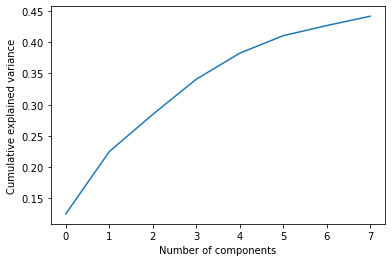

In [58]:
#the plot helps understand how much variance is explained after SVD.

explained_var_ratio = model_rf_svd_cv.named_steps['svd'].explained_variance_ratio_

# Plot the explained variance ratio against the number of components
plt.plot(np.cumsum(explained_var_ratio))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

#### Model's comparison

In [59]:
# Compare performance - train sets with cross-validation scoring against RMSE
rf_performance_cross_val = pd.concat([rf_cv, rf_svd_cv], axis=1)
# ---------
rf_performance_cross_val

model_rf  model_rf_svd
r2                 0.9614        0.8521
adj_r2             0.9588        0.8423
mean_cv_rmse 31,396,504.0  31,455,569.8
std_cv_rmse   7,235,911.3   6,887,032.2
coef_of_var        0.2305        0.2189

In [60]:
# Compare performance - test sets
rf_performance_test = pd.concat([rf_test, rf_svd_test], axis=1)
# ---------
rf_performance_test

model_rf  model_rf_svd
r2           0.6140        0.5398
adj_r2       0.4865        0.3877
rmse   60,253,891.7  65,790,722.2
mae     5,218,108.6   7,724,874.3
mape         0.6426       15.2028

# All models - performance

## Cross-validation on training set

In [144]:
# Please note that the thousand separators may appear incorrectly for you - if that is the case, please modify the functions at the beginning of the file as mentioned in the comments of the functions
all_performance_cross_val = pd.concat([linear_performance_cross_val, rf_performance_cross_val, gb_performance_cross_val], axis=1)
# ---------
all_performance_cross_val

model_linreg_f  model_ridge_f  model_svd_f     model_rf  \
r2                    0.6545         0.4957       0.4755       0.9614   
adj_r2                0.6544         0.4956       0.4754       0.9588   
mean_cv_rmse    94,765,183.8   82,310,965.2 82,698,018.7 31,396,504.0   
std_cv_rmse     22,744,698.6   26,801,694.0 26,154,785.9  7,235,911.3   
coef_of_var           0.2400         0.3256       0.3163       0.2305   

              model_rf_svd      base_gb     nodup_gb  catgroup_gb  \
r2                  0.8521       0.7546       0.9287       0.9395   
adj_r2              0.8423       0.7545       0.9286       0.9394   
mean_cv_rmse  31,455,569.8 85,822,880.6 58,504,264.1 54,633,112.1   
std_cv_rmse    6,887,032.2 25,361,034.4 21,694,606.1 24,192,030.0   
coef_of_var         0.2189       0.2955       0.3708       0.4428   

              flat_tuned_gb  
r2                   0.9969  
adj_r2               0.9965  
mean_cv_rmse   26,642,268.7  
std_cv_rmse    19,982,202.8  
coef_of_var          0.7500

## Evaluation on test set

In [143]:
# Please note that the thousand separators may appear incorrectly for you - if that is the case, please modify the functions at the beginning of the file as mentioned in the comments of the functions
all_performance_test = pd.concat([linear_performance_test, rf_performance_test, gb_performance_test], axis=1)
# ---------
all_performance_test

model_linreg_f  model_ridge_f   model_svd_f     model_rf  \
r2              0.5702         0.6283        0.6391       0.6140   
adj_r2          0.5697         0.6279        0.6387       0.4865   
rmse     128,229,239.3  119,235,127.6 117,498,887.3 60,253,891.7   
mae       40,203,041.0   29,436,624.2  30,138,338.3  5,218,108.6   
mape          125.3670       111.2556      116.1943       0.6426   

        model_rf_svd       base_gb     nodup_gb  catgroup_gb  flat_tuned_gb  
r2            0.5398        0.5037       0.4604       0.5816         0.9073  
adj_r2        0.3877        0.5033       0.4589       0.5805         0.8496  
rmse    65,790,722.2 141,670,000.0 48,820,755.0 42,987,381.1   17,875,161.4  
mae      7,724,874.3  27,204,562.1  8,949,026.6  8,729,483.5    3,291,717.6  
mape         15.2028       43.7782      40.5325      28.1006         4.1410

As can be seen the gradient boosting model with the preprocessing changes performes the best out of all the models tested across the board.